In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches,colors
import matplotlib.animation as animation
model_direc = 'C:/Users/Bas/Google Drive/Bas Games/'
from matplotlib import rc,rcParams
from IPython.display import HTML
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"


In [7]:
def show_board(fig,ax,black_pieces,white_pieces):
    patch_list=[ax.add_patch(patches.Rectangle((-0.5,-0.5),9,4,color="darkgray",fill=True,zorder=0))]
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5)
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5)
    for k in range(36):
        if(black_pieces[k]=='1'):
            circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
            patch_list.append(ax.add_patch(circ))
        if(white_pieces[k]=='1'):
            circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
            patch_list.append(ax.add_patch(circ))
    ax.axis('off')
    return patch_list
        


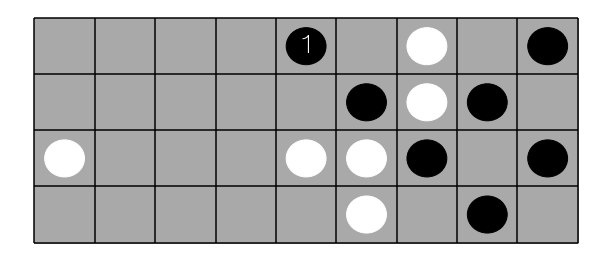

In [11]:
with open(model_direc + 'eye_trace_model.txt') as f:
    lines = f.read().splitlines()
    bp,wp = lines[0].split('\t')
    color=len(bp.split('1'))==len(wp.split('1'))

fig,ax = plt.subplots(figsize=(9,4))
fig.tight_layout()

patch_list_to_keep = show_board(fig,ax,bp,wp)
    
def animate(i):
    patches_to_remove = [patch for patch in ax.patches if patch not in patch_list_to_keep]
    text_to_remove = ax.texts
    for t in text_to_remove[::-1]:
        t.remove()
    for patch in patches_to_remove:
        patch.remove()
    patch_list=[]
    for i,m in enumerate([int(m) for m in lines[i].split(' ') if m!='']):
        circ = patches.Circle((m%9,m//9),0.33,color="white" if color^(i%2==0) else "black",fill=True)
        patch_list.append(ax.add_patch(circ))
        ax.text(x=m%9,y=m//9,s=i+1,color="black" if color^(i%2==0) else "white",
                 ha="center", va="center",size=24)
    return patch_list
                
anim = animation.FuncAnimation(fig, animate, frames=range(1,len(lines)), 
                               interval=150, blit=True, repeat=False)

HTML(anim.to_html5_video())

In [4]:
#import matplotlib.font_manager
#[f.name for f in matplotlib.font_manager.fontManager.ttflist]